In [1]:
import uproot
file = uproot.open('uproot-tutorial-file.root')
file

<ReadOnlyDirectory '/' at 0x7f5075085350>

In [2]:
file.keys()

['Events;1']

In [3]:
file.classnames()

{'Events;1': 'TTree'}

In [4]:
file['Events']

<TTree 'Events' (6 branches) at 0x7f50750856d0>

In [5]:
tree = file['Events']
tree.keys()

['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']

In [6]:
tree.arrays()

<Array [{nMuon: 2, Muon_pt: [10.8, ... -1, 1]}] type='100000 * {"nMuon": uint32,...'>

In [7]:
branches = tree.arrays()
branches['nMuon']

<Array [2, 2, 1, 4, 4, 3, ... 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

In [8]:
branches['Muon_pt']

<Array [[10.8, 15.7], ... 11.4, 3.08, 4.97]] type='100000 * var * float32'>

In [9]:
branches['Muon_pt'][0]

<Array [10.8, 15.7] type='2 * float32'>

In [10]:
branches['Muon_pt'][2]

<Array [3.28] type='1 * float32'>

In [11]:
for i in range(10):
    print(branches['Muon_pt'][i])

[10.8, 15.7]
[10.5, 16.3]
[3.28]
[11.4, 17.6, 9.62, 3.5]
[3.28, 3.64, 32.9, 23.7]
[3.57, 4.57, 4.37]
[57.6, 53]
[11.3, 23.9]
[10.2, 14.2]
[11.5, 3.47]


In [12]:
branches[0]

<Record ... 0.106], Muon_charge: [-1, -1]} type='{"nMuon": uint32, "Muon_pt": va...'>

In [13]:
branches[0].tolist()

{'nMuon': 2,
 'Muon_pt': [10.763696670532227, 15.736522674560547],
 'Muon_eta': [1.0668272972106934, -0.563786506652832],
 'Muon_phi': [-0.03427272289991379, 2.5426154136657715],
 'Muon_mass': [0.10565836727619171, 0.10565836727619171],
 'Muon_charge': [-1, -1]}

(array([8.7359e+04, 1.2253e+04, 3.5600e+02, 2.8000e+01, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

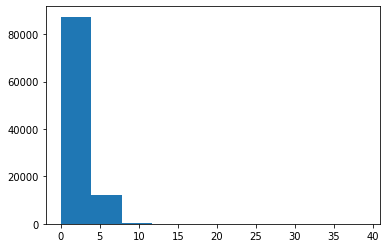

In [14]:
import matplotlib.pyplot as plt
plt.hist(branches['nMuon'])

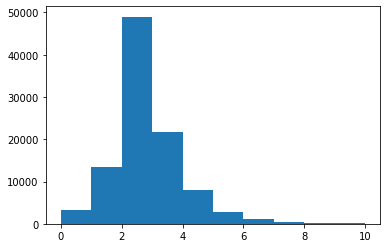

In [15]:
plt.hist(branches['nMuon'], bins=10, range=(0, 10))
plt.show()

In [16]:
import numpy as np
mean = np.mean(branches['nMuon'])
std = np.std(branches['nMuon'])
min = np.min(branches['nMuon'])
max = np.max(branches['nMuon'])
print(mean, std, min, max)

2.35286 1.19175912851549 0 39


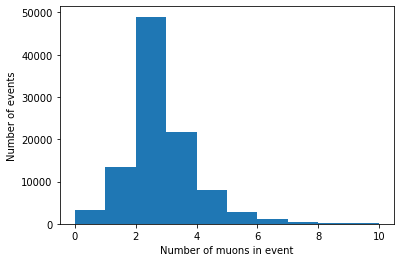

In [17]:
plt.hist(branches['nMuon'], bins=10, range=(0, 10))
plt.xlabel('Number of muons in event')
plt.ylabel('Number of events')
plt.show()

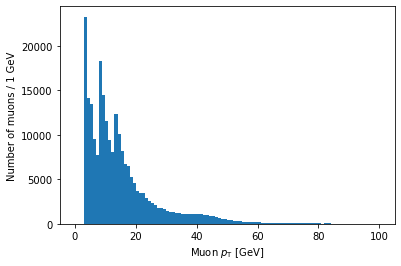

In [18]:
import awkward as ak
plt.hist(ak.flatten(branches['Muon_pt']), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()

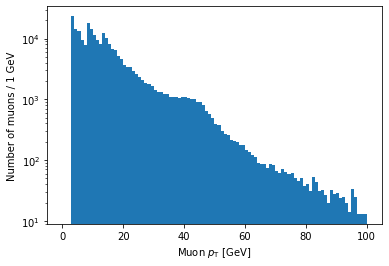

In [19]:
plt.hist(ak.flatten(branches['Muon_pt']), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.yscale('log')
plt.show()

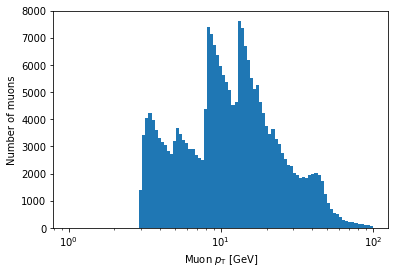

In [20]:
import numpy as np
plt.hist(ak.flatten(branches['Muon_pt']), bins=np.logspace(np.log10(1), np.log10(100), 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.xscale('log')
plt.ylabel('Number of muons')
plt.show()

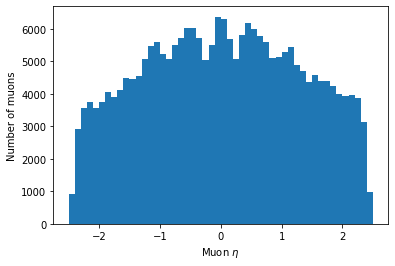

In [21]:
plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

In [22]:
len(branches['nMuon'])

100000

In [23]:
len(ak.flatten(branches['Muon_pt']))

235286

In [24]:
branches['nMuon'] == 1

<Array [False, False, True, ... False, False] type='100000 * bool'>

In [25]:
single_muon_mask = branches['nMuon'] == 1
np.sum(single_muon_mask)

13447

In [26]:
branches['Muon_pt'][single_muon_mask]

<Array [[3.28], [3.84], ... [13.3], [9.48]] type='13447 * var * float32'>

In [27]:
len(branches['Muon_pt'][single_muon_mask])

13447

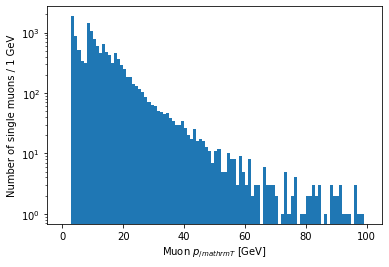

In [28]:
plt.hist(ak.flatten(branches['Muon_pt'][single_muon_mask]), bins=100, range=(0,100))
plt.xlabel('Muon $p_{/mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 1 GeV')
plt.yscale('log')
plt.show()

In [29]:
eta_mask = abs(branches['Muon_eta']) < 2
eta_mask

<Array [[True, True], ... True, True, True]] type='100000 * var * bool'>

In [30]:
np.sum(eta_mask)


204564

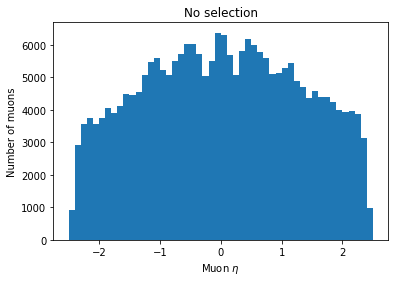

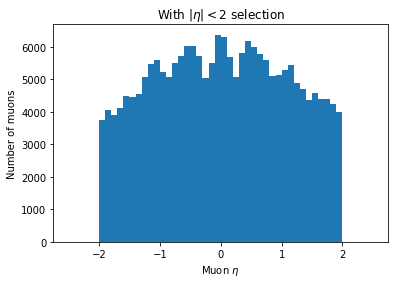

In [31]:
plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.title('No selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

plt.hist(ak.flatten(branches['Muon_eta'][eta_mask]), bins=50, range=(-2.5, 2.5))
plt.title('With $|\eta| < 2$ selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

In [32]:
NOT = ~single_muon_mask
INTSC = single_muon_mask & eta_mask
UNION = single_muon_mask | eta_mask
print(NOT, INTSC, UNION)


[True, True, False, True, True, True, True, ... True, True, True, True, True, True] [[False, False], [False, False], [False, ... [False, False], [False, False, False]] [[True, True], [True, True], [True], ... True], [True, True], [True, True, True]]


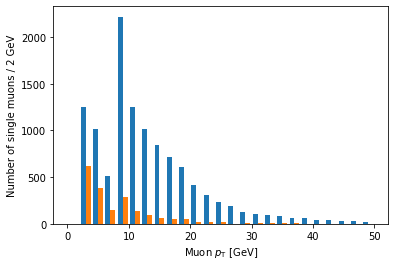

In [33]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]), 
         ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         bins=25, range=(0,50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.show()
        

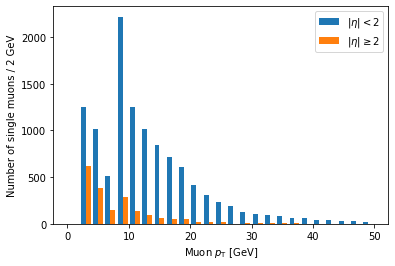

In [34]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

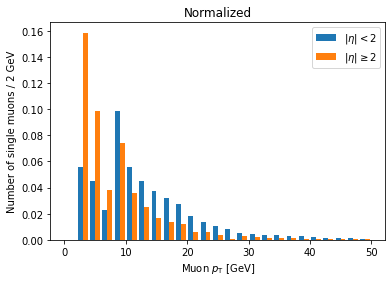

In [35]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         bins=25, range=(0, 50), density=True)
plt.title('Normalized')
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

In [36]:
import vector
two_muons_mask = branches['nMuon'] == 2
muon_p4 = vector.zip({'pt':branches['Muon_pt'], 
                      'eta': branches['Muon_eta'], 
                      'phi': branches['Muon_phi'], 
                      'mass':branches['Muon_mass']})
two_muons_p4 = muon_p4[two_muons_mask]
print(two_muons_p4)

[[{rho: 10.8, phi: -0.0343, eta: 1.07, tau: 0.106}, ... eta: 0.477, tau: 0.106}]]


In [37]:
print(
two_muons_p4.pt,
two_muons_p4.eta,
two_muons_p4.phi,
two_muons_p4.E,
two_muons_p4.mass
)

[[10.8, 15.7], [10.5, 16.3], [57.6, 53], ... 9.58, 3.33], [46.4, 43.9], [3.31, 15.7]] [[1.07, -0.564], [-0.428, 0.349], [-0.532, ... 2.2], [-1.93, -2.27], [1.64, 0.477]] [[-0.0343, 2.54], [-0.275, 2.54], [-0.0718, ... -2.71], [-2.38, 0.86], [0.88, -1.75]] [[17.5, 18.3], [11.5, 17.3], [66, 82.1], ... [22.8, 15.2], [163, 215], [8.82, 17.5]] [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]


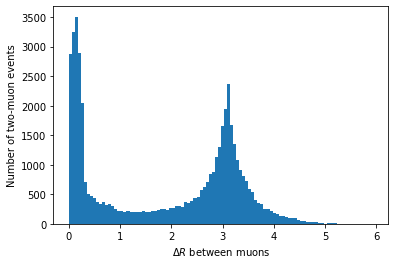

In [38]:
first_muon_p4 = two_muons_p4[:,0]
second_muon_p4 = two_muons_p4[:,1]

plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=100)
plt.xlabel('$\Delta R$ between muons')
plt.ylabel('Number of two-muon events')
plt.show()

In [39]:
sum_p4 = first_muon_p4 + second_muon_p4
sum_p4

<MomentumArray4D [{rho: 8.79, phi: 1.83, ... tau: 16.5}] type='48976 * Momentum4...'>

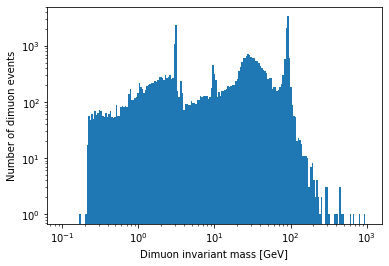

In [40]:
two_muons_charges = branches['Muon_charge'][two_muons_mask]
opposite_sign_muons_mask = two_muons_charges[:,0] != two_muons_charges[:,1]
dimuon_p4 = sum_p4[opposite_sign_muons_mask]

plt.hist(dimuon_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events')
plt.xscale('log')
plt.yscale('log')
plt.show()

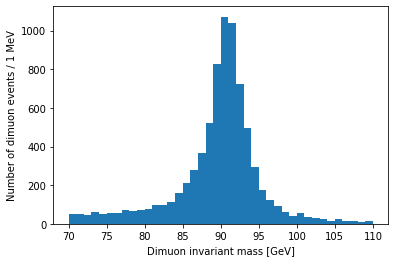

In [41]:
#zoom in on Z-Resonance
plt.hist(dimuon_p4.mass, bins=40, range=(70, 110))
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.show()

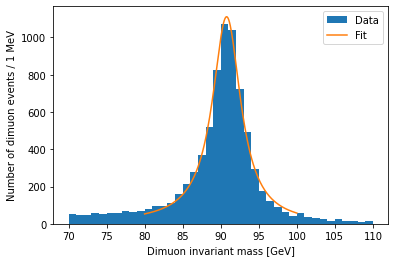

In [42]:
from scipy.optimize import curve_fit

def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

bin_contents, bin_edges = np.histogram(dimuon_p4.mass.to_numpy(), bins=20, range=(80, 100))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
popt, pcov = curve_fit(relativistic_breit_wigner, bin_centers, bin_contents, p0=[90, 10, 1000], sigma=np.sqrt(bin_contents))

plt.hist(dimuon_p4.mass, bins=40, range=(70, 110), label='Data')
x = np.linspace(80, 100, 200)
y = relativistic_breit_wigner(x, *popt)
plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.legend()
plt.show()